In [6]:
source('helpers.R')

In [5]:
prepost <- readRDS("../../../ProcessedData/seurat/annotated_prepost_csf.rds")

In [7]:
prepost$cell_type <- factor(prepost$cell_type, levels = cell_type_levels)

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's fill values."


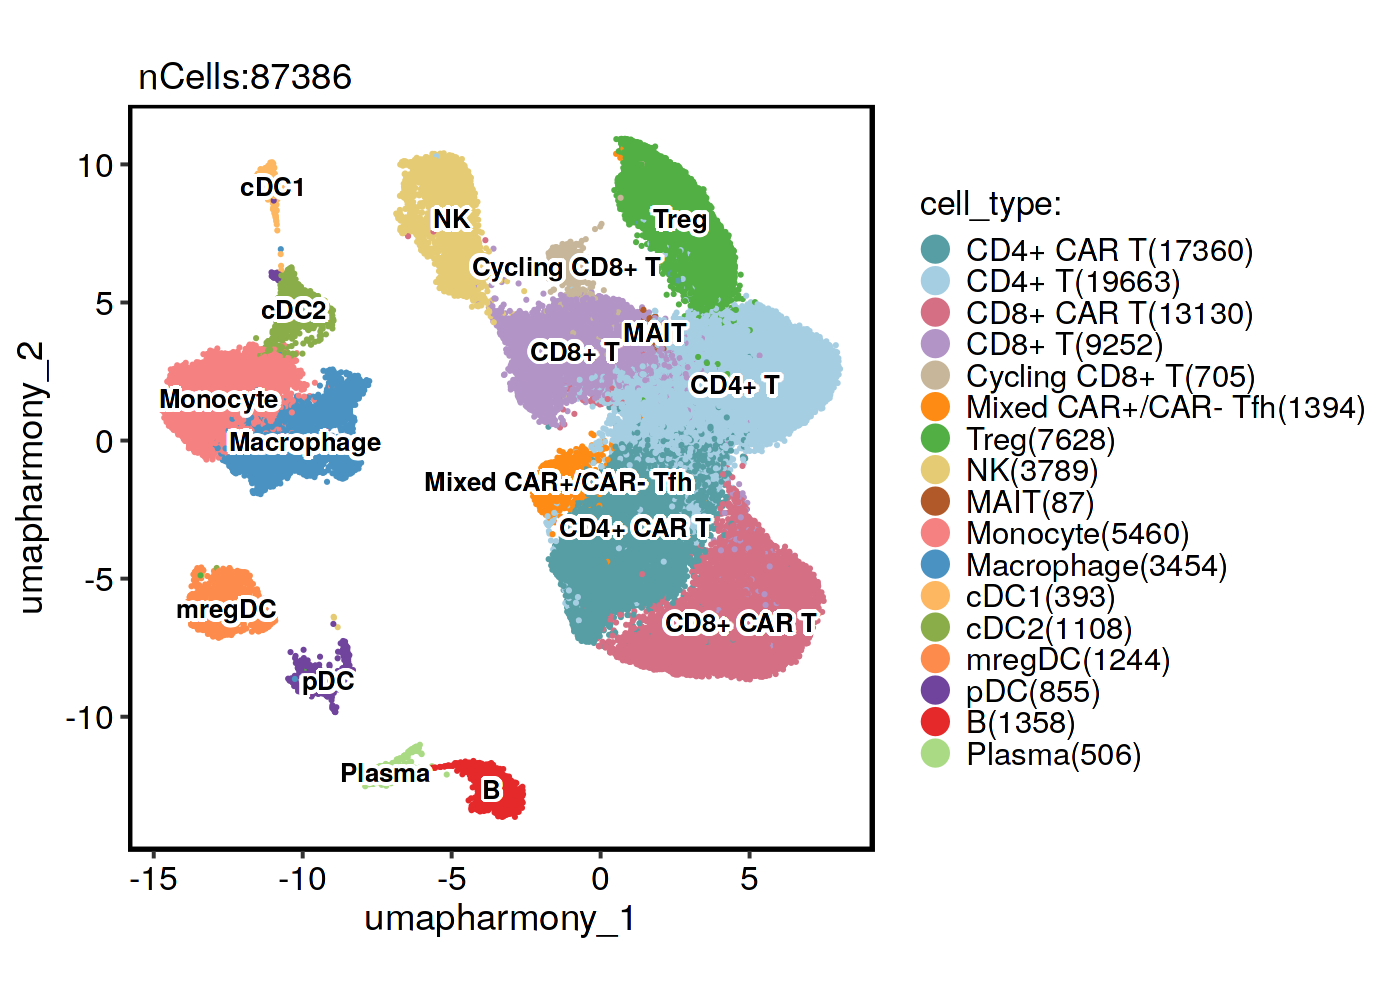

In [14]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res=200)
p <- CellDimPlot(srt = prepost, group.by = c( "cell_type"), pt.size=.1, pt.alpha = 1, palcolor=cell_type_cols[cell_type_levels],
            label=T,label_insitu = TRUE, label.fg = "black", label.bg = "white", label.size = 3.2, label.bg.r=0.2,
    ncol=1, reduction = "umap.harmony")
p

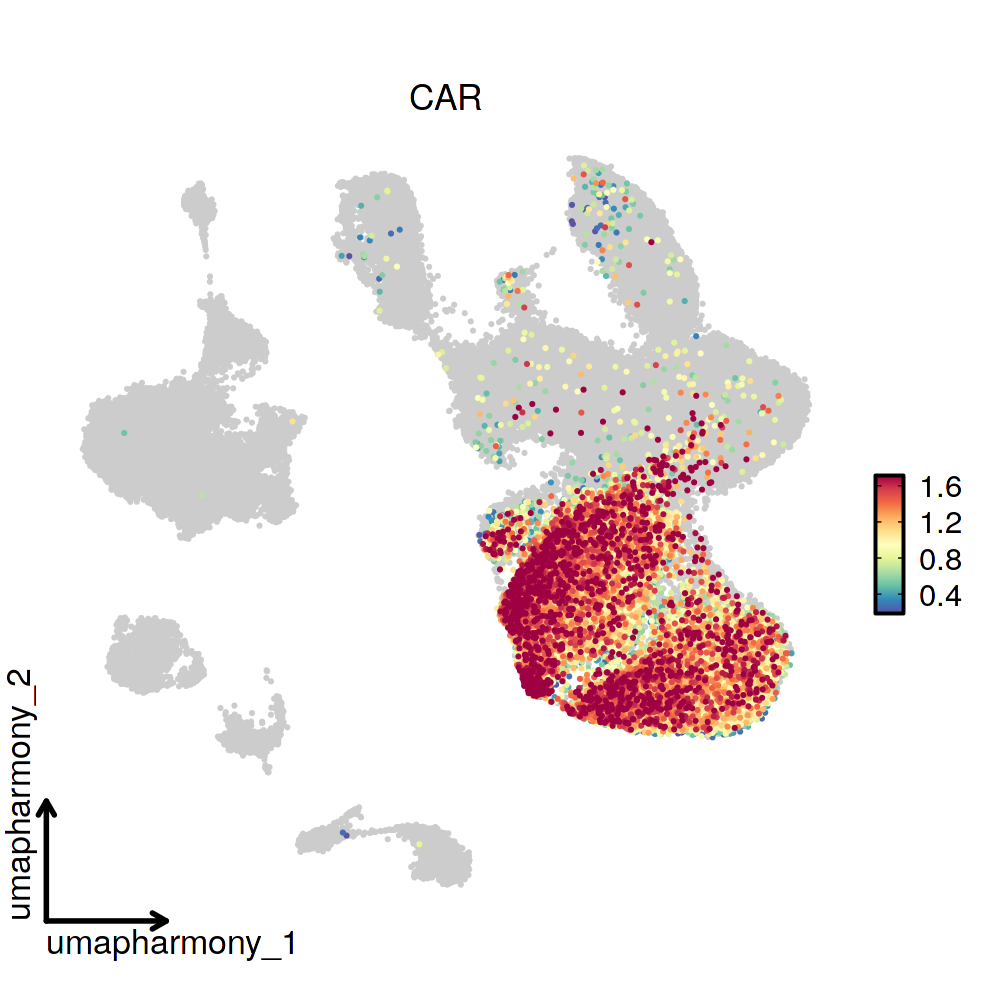

In [13]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res=200)
FeatureDimPlot(prepost,  features = c('CAR'),  ncol=3,reduction = "umap.harmony", show_stat=F, upper_quantile = 0.95, 
               theme_use = "theme_blank", label = F, pt.size=0.1)

In [21]:
day_patient_table <- table(prepost$Patient, prepost$Day) 
day_patient_df <- as.data.frame.matrix(day_patient_table)
day_patient_df$Patient <- rownames(day_patient_df) 
day_patient_df <- day_patient_df[, c("Patient", colnames(day_patient_df)[colnames(day_patient_df) != "Patient"])] 
write.csv(day_patient_df, file.path(panel.path, "patient_day_data.csv"),  row.names = FALSE)

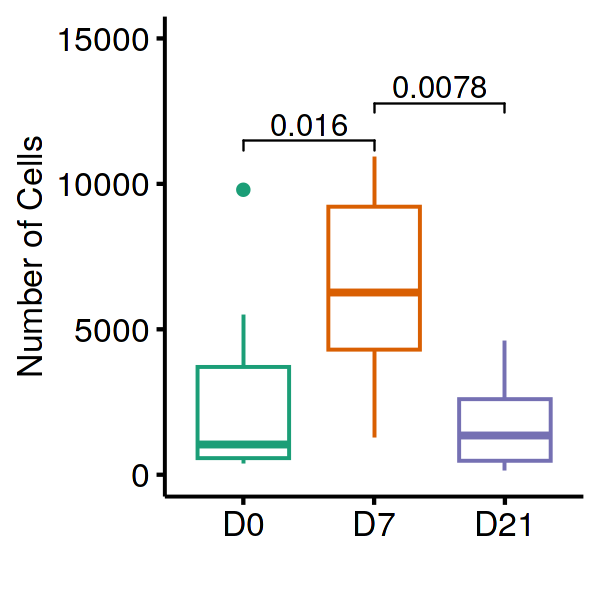

In [24]:
meta <- prepost@meta.data
df <- as.data.frame(as.table(table(meta$Day, meta$Patient)))
names(df) <- c("Day", "Patient", "Estimated_Number_of_Cells")
df$Day <- factor(df$Day, levels = c("D0", "D7", "D21"))
my_comparisons <- list(c(1, 2), c(2, 3))
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res=200)
p <- ggboxplot(df, x = "Day", y = "Estimated_Number_of_Cells", color = "Day", palette = "Dark2") + ylim(0,15000)+
    stat_compare_means(comparisons = my_comparisons, paired=T) + xlab('') + ylab('Number of Cells') + NoLegend() 
p

In [25]:
pdf(file.path(panel.path, "1E.pdf"), width=3, height=3, family = "sans")
p
while (!is.null(dev.list()))  dev.off()